In [2]:
from Functions_thesis import *
from Functions_plotting import *

#Paramters for config:
T = range(24)
LT=len(T)
eff = 0.9

PW_cap=300 #MWh

SOC_cap = 225 #MWh

P_DIS_CH = 75 #MWh
SOC_init = 0

problem_parameters = {'PW_cap':PW_cap,'SOC_cap':SOC_cap,'P_DIS_CH':P_DIS_CH,'SOC_init':SOC_init,'eff':eff}

n_var=4
n_constraints=10

variables = ['pCH','pDIS','Aux y','SOC']

Target = ['DA_DK2','windpower']

EQUAL = Traders_equality("Equality", T, problem_parameters, n_var, n_constraints,variables,Target)

reduced_features = ['DA_DE_Lag',
                    'DA_DK1_Lag',
                    'DA_DK2_Lag',
                    'DA_DK2_Q25',
                    'DA_DK2_Q50',
                    'DA_DK2_Q75',
                    'DA_DK2_mean',
                    'DA_NO2_Lag',
                    'ForecastDAOnshore_Wind_DK1',
                    'ForecastDAOnshore_Wind_DK2',
                    'RT_NO2_Lag',
                    'Scheduled_Gen_DA_DK2',
                    'max_wind_speed_10min_DK1',
                    'max_wind_speed_10min_DK2',
                    'max_wind_speed_3sec_DK1',
                    'max_wind_speed_3sec_DK2',
                    'mean_wind_speed_DK1',
                    'mean_wind_speed_DK2']

data, IDS, train_ID, test_ID, features, scaler = load_data('DataV4_shifted.pkl',EQUAL,0.8,problem_parameters,False)


dataset = dataset_creator(EQUAL,data,IDS,reduced_features)

extract_train_data(EQUAL,train_ID)
extract_test_data(EQUAL,test_ID)

Number of training samples: 790
Number of test samples: 198
PW 1.0
P_DIS_CH 0.25
SOC_init 0.0
SOC_cap 0.75
Efficiency 0.9
Max DA: 871.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-20
Features used: ['DA_DE_Lag', 'DA_DK1_Lag', 'DA_DK2_Lag', 'DA_DK2_Q25', 'DA_DK2_Q50', 'DA_DK2_Q75', 'DA_DK2_mean', 'DA_NO2_Lag', 'ForecastDAOnshore_Wind_DK1', 'ForecastDAOnshore_Wind_DK2', 'RT_NO2_Lag', 'Scheduled_Gen_DA_DK2', 'max_wind_speed_10min_DK1', 'max_wind_speed_10min_DK2', 'max_wind_speed_3sec_DK1', 'max_wind_speed_3sec_DK2', 'mean_wind_speed_DK1', 'mean_wind_speed_DK2']


In [3]:
# regu = ['Ridge',0.5,0.1]

# gen_loss, w_prediction, predictions_spo, predictions_sequential, dual_prediction, sample_loss, z_realised, B, infeasibles=spo_framework_v2(EQUAL,data,IDS,train_ID,test_ID,reduced_features,True,regularisation=regu)

# total_results={'gen_loss':gen_loss,
#                'w_prediction':w_prediction,
#                'predictions_spo':predictions_spo,
#                'predictions_sequential':predictions_sequential,
#                'dual_prediction':dual_prediction,
#                'sample_loss':sample_loss,
#                'z_realised':z_realised,
#                'B':B,
#                'infeasibles':infeasibles}

# boxplot_spo_loss(sample_loss,infeasibles,True, n_samples=True, fig_size=(12,6), box_width=0.4)

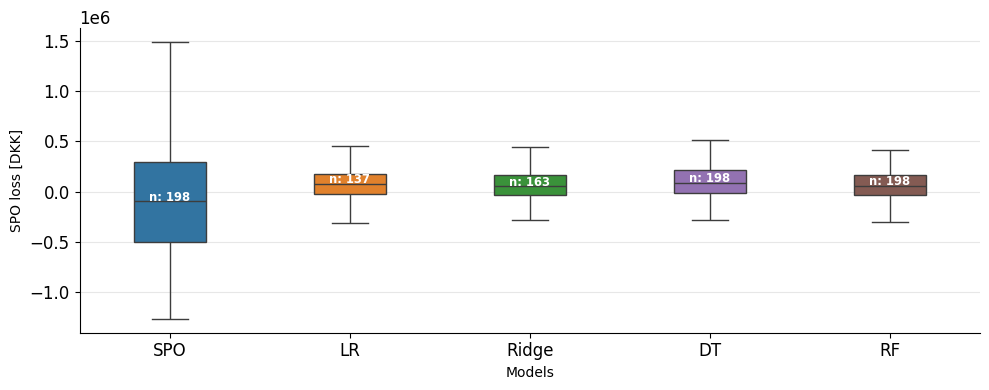

{'SPO': -61385.58742376889,
 'LR': 82891.79147742089,
 'Ridge': 66522.2299140517,
 'DT': 111110.08288922707,
 'RF': 71037.57406772004}

In [4]:
res = pd.read_pickle("Traders_Results_for_report\\tot_res_c_restrict_new.pkl")
gen_loss = res['gen_loss']
w_prediction = res['w_prediction']
prediction_spo = res['predictions_spo']
prediction_seq = res['predictions_sequential']
dual_prediction = res['dual_prediction']
sample_loss = res['sample_loss']
z_realised = res['z_realised']
B = res['B']
infeasibles = res['infeasibles']

# Define a mapping of old keys to new keys
key_mapping = {
    'SPO - Ridge - 0.5': 'SPO',
    'LR_seq': 'LR',
    'Ridge_seq': 'Ridge',
    'Lasso_seq': 'Lasso',
    'DT_seq': 'DT',
    'RF_seq': 'RF'
}

# Create a new dictionary with renamed keys
sample_loss = {key_mapping.get(k, k): v for k, v in sample_loss.items()}
infeasibles = {key_mapping.get(k, k): v for k, v in infeasibles.items()}
w_prediction = {key_mapping.get(k, k): v for k, v in w_prediction.items()}
prediction_spo = {key_mapping.get(k, k): v for k, v in prediction_spo.items()}


del sample_loss['Lasso']
del infeasibles['Lasso'] 
#  Get the 'tab10' color palette
tab10_palette = sns.color_palette("tab10")
# Remove the 4th color (which is red)
updated_palette = tab10_palette[:3] + tab10_palette[4:]
# Set the updated palette as the default
sns.set_palette(updated_palette)

boxplot_spo_loss(sample_loss,infeasibles,False,True,(10,4),0.4,"Plots\c_restricted")

gen_loss2={} #Without infeasible
for model in sample_loss.keys():
    loss = []
    for i in range(len(test_ID)):
        if infeasibles[model][i]==0:
            loss.append(sample_loss[model][i])
    gen_loss2[model]=np.mean(loss)

gen_loss2

Clustering 

In [5]:
clustering_res = pd.read_pickle("Traders_Results_for_report\\res_c_tslearn.pkl")


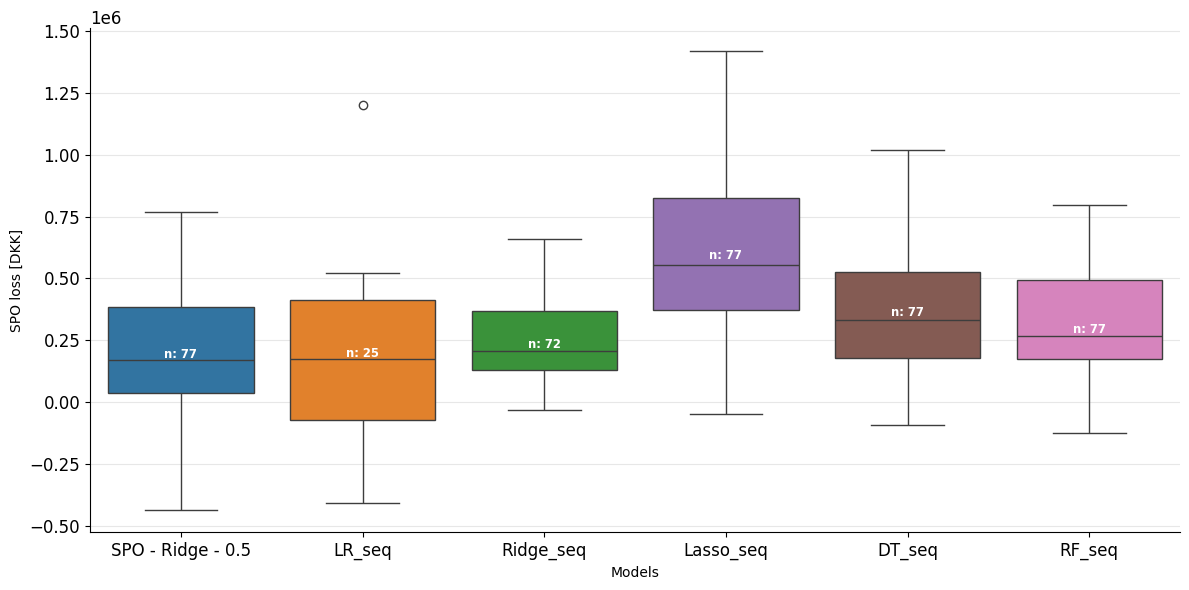

In [6]:
clust = "Cluster 1"

boxplot_spo_loss(clustering_res[clust]['sample_loss'],clustering_res[clust]['infeasibles'],True)

In [7]:
clust = "Cluster 3"


gen_loss2={} #Without infeasible
for model in clustering_res[clust]['sample_loss'].keys():
    loss = []
    for i in range(len(clustering_res[clust]['infeasibles'][model])):
        if clustering_res[clust]['infeasibles'][model][i]==0:
            loss.append(clustering_res[clust]['sample_loss'][model][i])
    gen_loss2[model]=np.mean(loss)
gen_loss2

{'SPO - Ridge - 0.5': -513592.42663325684,
 'LR_seq': -530689.5186763662,
 'Ridge_seq': -471330.45142197394,
 'Lasso_seq': -1954176.190629037,
 'DT_seq': -1352009.3766792065,
 'RF_seq': -1054120.8503304503}

In [14]:
sample_id = 904 #Same sample as earlier in the report
test_ID
idx = np.where(test_ID == sample_id)[0][0] 

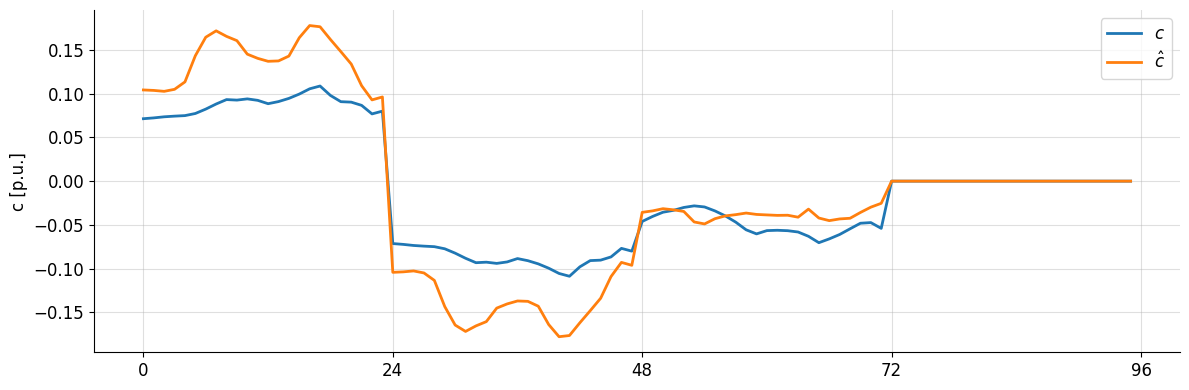

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

x_values = np.arange(0, 24*4)

idx = 5

ax.plot(prediction_spo['Target'][idx],label="${c}$",color="C0",linewidth=2)
ax.plot(prediction_spo['SPO'][idx],label="$\hat{c}$",color="C1",linewidth=2)
ax.set_ylabel("c [p.u.]")
ax.grid(alpha=0.4)
ax.legend()
ax.set_xticks([0, 24, 48, 72, 96])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend()
plt.tight_layout()
fig.set_facecolor(color='white')
plt.savefig("Plots\\c_vector_traders.png",dpi=300)
plt.savefig("Plots\\c_restricted_vector_traders_with_prediction.png",dpi=300)

In [21]:
# fig, ax = plt.subplots(1,1,figsize=(12,4))

# x_values = np.arange(0, 24*4)


# ax.plot(w_prediction['Target'][idx]/EQUAL.base_scaler,label="$w$",color="C0",linewidth=2)
# # ax.plot(w_prediction['SPO'][idx],label="$w(\hat{c})$",color="C1",linewidth=2)
# ax.set_ylabel("w [p.u.]")
# ax.grid(alpha=0.4)
# ax.legend()
# ax.set_xticks([0, 24, 48, 72, 96])
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# plt.legend()
# plt.tight_layout()
# fig.set_facecolor(color='white')
# plt.savefig("Plots\\w_vector_traders.png",dpi=300)

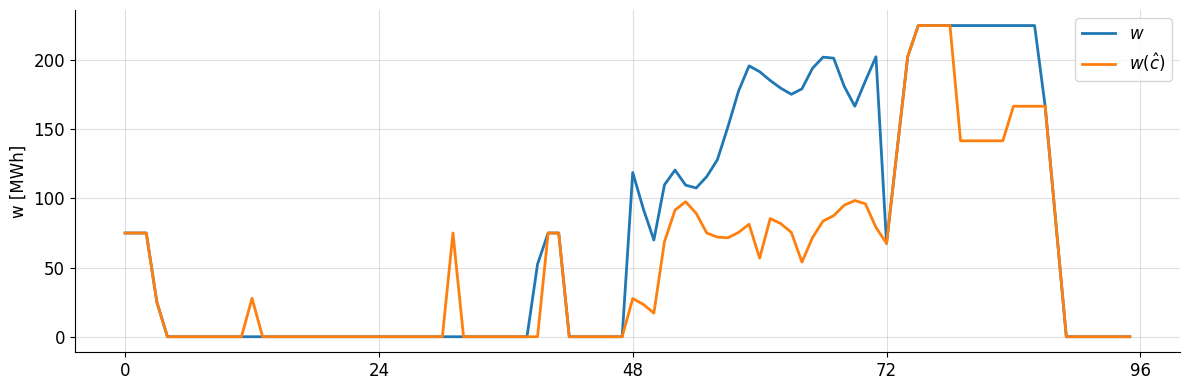

In [24]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

x_values = np.arange(0, 24*4)

PW_true = EQUAL.dataset[test_ID[idx]]['windpower']
DA_true= EQUAL.dataset[test_ID[idx]]['DA_DK2']

# Solve the primary problem
res = producers_problem_standard_form_equality(EQUAL, DA_true, PW_true)
w_op=np.hstack((res['pCH'],res['pDIS'],res['pW'],res['SOC']))

ax.plot(w_op*EQUAL.base_scaler,label="$w$",color="C0",linewidth=2)
ax.plot(w_prediction['SPO'][idx],label="$w(\hat{c})$",color="C1",linewidth=2)
ax.set_ylabel("w [MWh]")
ax.grid(alpha=0.4)
ax.legend()
ax.set_xticks([0, 24, 48, 72, 96])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend()
plt.tight_layout()
fig.set_facecolor(color='white')
plt.savefig("Plots\\w_vector_traders.png",dpi=300)

In [8]:
np.sum(w_prediction['SPO'][idx][24:48]*(DA_true*EQUAL.DA_scaler))

147085.3488825

In [9]:
sample_loss['SPO'][idx]-147085.3488825

1001632.9561857701

In [10]:
def stochastic_traders(config, train_ID, data):
    DA_scenarios = []
    PW_scenarios = []
    BAL_scenarios = []
    for i in range(len(train_ID)):
        DA_scenarios.append(config.dataset[i]['DA_DK2'])
        PW_scenarios.append(config.dataset[i]['windpower'])
        BAL_scenarios.append(data[data['ID']==train_ID[i]].RT_DK2.values/config.DA_scaler)

    # Problem
    T = config.T
    P_DIS_CH = config.P_DIS_CH
    SOC_init = config.SOC_init
    SOC_cap = config.SOC_cap
    eff = config.eff

    scenarios = train_ID
    n_scenarios = len(scenarios)
    prob = 1/n_scenarios
    K = range(n_scenarios)

    model = gp.Model("Stochastic model of Producers problem")
    model.Params.LogToConsole = 0
    p_w = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="windpower")
    p_ch = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS charge")
    p_dis = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS discharge")
    SOC = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS SOC")
    Delta = model.addVars(K, T, vtype=GRB.CONTINUOUS,
                          lb=-GRB.INFINITY, name="Delta")

    model.setObjective(prob*gp.quicksum(DA_scenarios[k][t]*(
        p_w[t]+p_dis[t]) + BAL_scenarios[k][t]*Delta[k, t] for t in T for k in K), sense=GRB.MAXIMIZE)
    # Objective: Maximize expected profit from both DA and balancing market

    c1 = model.addConstrs((p_w[t]+p_ch[t] <= config.PW_cap for t in T))
    c2 = model.addConstrs(
        (p_ch[t] <= P_DIS_CH for t in T), name="Upper ch")
    c3 = model.addConstrs(
        (p_dis[t] <= P_DIS_CH for t in T), name="Upper dis")
    c4 = model.addConstr(
        (SOC[0] == SOC_init + eff * p_ch[0] - 1/eff * p_dis[0]), name="SOC 1")
    c5 = model.addConstrs((SOC[t] == SOC[t-1] + eff * p_ch[t] -
                           1/eff * p_dis[t] for t in range(1, len(T))), name="SOC t")
    c6 = model.addConstrs((SOC[t] <= SOC_cap for t in T), name="Upper SOC")

    c7 = model.addConstrs((Delta[k, t] == PW_scenarios[k][t] - (p_w[t]+p_ch[t])
                          for k in K for t in T), name="Delta constraint")

    # Optimize
    model.optimize()
    if model.status == GRB.OPTIMAL:
        print("Optimal")
        obj = model.ObjVal
        print(obj)
        p_w_res = np.array([p_w[t].x for t in T])
        p_ch_res = np.array([p_ch[t].x for t in T])
        p_dis_res = np.array([p_dis[t].x for t in T])
        SOC_res = np.array([SOC[t].x for t in T])
        Delta_res = []
        for k in K:
            Delta_res.append(np.array([Delta[k, t].x for t in T]))
        res_stochastic = {'z': obj,
                          'p_w': p_w_res,
                          'pCH': p_ch_res,
                          'pDIS': p_dis_res,
                          'SOC': SOC_res,
                          'Delta_res': Delta_res,
                          'infeasibles': 0}
    return res_stochastic

In [11]:
RT = pd.read_csv("RT_price.csv")
RT = RT.rename(columns={"HourUTC": "timestamp"})
RT['timestamp'] = pd.to_datetime(RT['timestamp'])
RT = RT.set_index("timestamp", drop=True)
RT = RT*7.45
data['RT_DK2'] = RT.loc[data.index, 'RT_DK2']

res = stochastic_traders(EQUAL, train_ID, data)

pch_sto = res['pCH']
pdis_sto = res['pDIS']
pw_sto = res['p_w']
soc_sto = res['SOC']

w_sto = np.hstack((pch_sto,pdis_sto,pw_sto,soc_sto))*EQUAL.base_scaler
w_stochastic = np.array([w_sto for i in range(len(test_ID))])
infeasibles_sto = np.zeros(len(test_ID))
infeasibles['Sto'] = infeasibles_sto
w_prediction['Sto']=w_stochastic

Optimal
0.856194701206678


In [12]:
#Feasibility check:
check_decision = "pw_pch"
# model = 'SPO - Ridge - 2.5'
# check_decision = "pch"
i=0
infeasible_prediction=traders_feasibility_check(EQUAL,w_prediction,check_decision,test_ID)

del w_prediction['Target']

for model in infeasible_prediction.keys():
    print(f"{model}: {np.sum(infeasible_prediction[model])/len(infeasible_prediction[model])*100:.2f} %")
#Tilføj stochastics

SPO: 88.38 %
Target: 100.00 %
LR: 67.68 %
Ridge: 80.30 %
Lasso: 84.34 %
DT: 95.96 %
RF: 95.96 %
Sto: 100.00 %


In [13]:
w_prediction['SPO'][0]

array([ 28.22495555,  72.32082391,  74.45422054,  75.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        52.5       ,  75.        ,  75.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        47.30465702,   0.        ,   0.        ,   1.47158425,
        73.9309463 ,  76.38384344,  76.61486065,  52.26374475,
        55.7545696 ,  70.10279133,  68.46502473,  74.35446287,
        71.72558764,  71.27932319,  70.89921032,  69.79

In [18]:
Delta_tot = {}
RT_tot = {}
Balance_cost_tot = {}
idx = 3

# del w_prediction['Lasso']

for model in w_prediction.keys():
    Delta = []
    RT = []
    Balance_cost = []
    for idx in range(len(test_ID)):
        if infeasibles[model][idx]==0:
            pch = w_prediction[model][idx][:24]
            pw = w_prediction[model][idx][48:72]
            PW_true = EQUAL.dataset[test_ID[idx]]['windpower']*EQUAL.base_scaler
            RT_val = data[data['ID'] == test_ID[idx]].RT_DK2
            RT.append(RT_val)
            pDA_tot = pch+pw
            delta = PW_true-pDA_tot
            Delta.append(delta)
            bal_cost = np.sum(RT_val*delta)
            Balance_cost.append(bal_cost)
        # else:
        #     Delta.append(np.zeros(24))
        #     RT.append(np.zeros(24))
        #     Balance_cost.append(0)
    Delta_tot[model]=np.array(Delta)
    RT_tot[model]=np.array(RT)
    Balance_cost_tot[model]=np.array(Balance_cost)

for model in Balance_cost_tot.keys():
    print(f"{model}: {np.mean(Balance_cost_tot[model])}")

print()
for model in Delta_tot.keys():
    print(f"{model}: {np.mean(abs(Delta_tot[model]))}")


SPO: -95511.48572392069
LR: 7823.046519568071
Ridge: 21947.712384826184
DT: 41776.419966972695
RF: 28430.276712437862
Sto: -1416281.0042855006

SPO: 55.405682932928414
LR: 21.027474037707552
Ridge: 18.120741849273394
DT: 29.12275470944641
RF: 20.16904889506016
Sto: 155.93356504151095
